# TRABAJO PRÁCTICO SOFIA MORALES
# MATEMÁTICA III, UNSAM.
# FECHA DE ENTREGA: 10/11/2022


Consigna de creatividad propia:
Se nos pidió analizar en base a un conjunto de datos, el rendimiento y las estadísticas geográficas de ciertos corredores que participaron en 
una maratón en Nueva York, nos pidieron que se haga de manera anónima por lo que debemos omitir el dato de los números de corredores. 
Los datos que nos interesan son la edad, el género y el tiempo, ya que los gráficos tendrán en cuenta,entre otras cosas, edad y tiempo, para cada género por separado. 

ACLARACION: Usé funciones para cada gráfico, de esta manera puedo usar los mismos gráficos con diferentes dataset.

In [44]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import sklearn.model_selection 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

Voy a empezar a ver con qué datos cuento en mi dataset. Sus columnas; cantidad de filas; cantidad de datos en general; datos nulos; normalización, etcétera.

In [45]:
df = pd.read_csv("MaratonNY.csv")
df.head()

,Corredor,place,gender,age,home,time
0,3475,3592,Male,52,GBR,217.483333
1,13594,13853,Female,40,NY,272.550000
2,12012,12256,Male,31,FRA,265.283333
3,10236,10457,Female,33,MI,256.150000
4,9476,9686,Male,33,NY,252.250000


In [46]:
df.shape

(1000, 6)

In [47]:
df.describe()

,Corredor,place,age,time
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,11763.113000,11992.319000,39.100000,268.570700
std,6761.839631,6858.858466,10.675391,53.550743
min,53.000000,54.000000,5.000000,147.333333
25%,5936.000000,6095.000000,31.000000,233.775000
50%,11722.000000,11962.000000,38.000000,262.841667
75%,17600.500000,17921.750000,46.000000,294.854167
max,23290.000000,23662.000000,81.000000,566.783333


In [48]:
"""  voy a ver si hay algún valor nulo   """
df.isnull().any()


Corredor    False
place       False
gender      False
age         False
home         True
time        False
dtype: bool

In [49]:
df.info()
""" acá vemos que falta un dato en la columna 'home' """

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Corredor  1000 non-null   int64  
 1   place     1000 non-null   int64  
 2   gender    1000 non-null   object 
 3   age       1000 non-null   int64  
 4   home      999 non-null    object 
 5   time      1000 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


" acá vemos que falta un dato en la columna 'home' "

In [50]:
df.fillna(value='AA')

,Corredor,place,gender,age,home,time
0,3475,3592,Male,52,GBR,217.483333
1,13594,13853,Female,40,NY,272.550000
2,12012,12256,Male,31,FRA,265.283333
3,10236,10457,Female,33,MI,256.150000
4,9476,9686,Male,33,NY,252.250000
...,...,...,...,...,...,...
995,15972,16261,Male,61,FRA,285.883333
996,1090,1131,Male,37,GBR,191.916667
997,16419,16713,Female,53,IRL,289.016667
998,13977,14241,Female,21,NY,276.050000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Corredor  1000 non-null   int64  
 1   place     1000 non-null   int64  
 2   gender    1000 non-null   object 
 3   age       1000 non-null   int64  
 4   home      999 non-null    object 
 5   time      1000 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [52]:
df['home'].dropna()

0      GBR
1       NY
2      FRA
3       MI
4       NY
      ... 
995    FRA
996    GBR
997    IRL
998     NY
999    GER
Name: home, Length: 999, dtype: object

# Teniendo en cuenta este modelo preeliminar de tabla, voy a preprocesar los datos y empezar a trabajar con ellos 

In [53]:
df[['gender','age','time']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gender  1000 non-null   object 
 1   age     1000 non-null   int64  
 2   time    1000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


In [54]:
"""acá voy a ordenar los datos que me interesan
asi despues trabajo con estas variables directamente, según mi consigna es 
anónimo por lo que los datos de la col. 0 no me interesan"""
columnaPosicion=df.iloc[:,1]
columnaGeneros=df.iloc[:,2]
columnaEdad=df.iloc[:,3]
columnaResidencia=df.iloc[:,4]
columnaTiempo=df.iloc[:,5] 

# >PORCENTAJE DE HOMBRES Y MUJERES QUE PARTICIPARON DE LA MARATÓN

([<matplotlib.patches.Wedge at 0x1935e8b7940>,
 [Text(-0.668723339239323, 0.8733894294967218, 'hombres'),
  Text(0.7295163700792614, -0.9527884685418786, 'mujeres')],
 [Text(-0.3647581850396307, 0.47639423427093913, '70.8 %'),
  Text(0.4255512158795691, -0.5557932733160957, '29.2 %')])

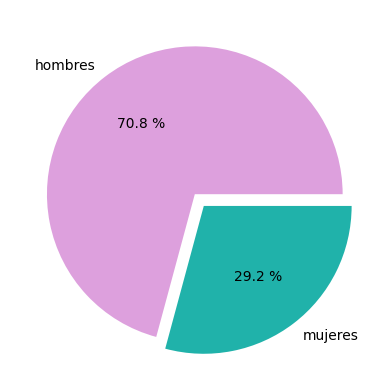

In [55]:
x=df['gender'].value_counts()
desfase=(0,0.1)
colores=['plum','lightseagreen']
plt.pie(x,labels=('hombres','mujeres'),autopct="%0.1f %%", colors=colores, explode=desfase)

# >PROMEDIO EN TIEMPO DISCRIMINADO POR GENERO

[]

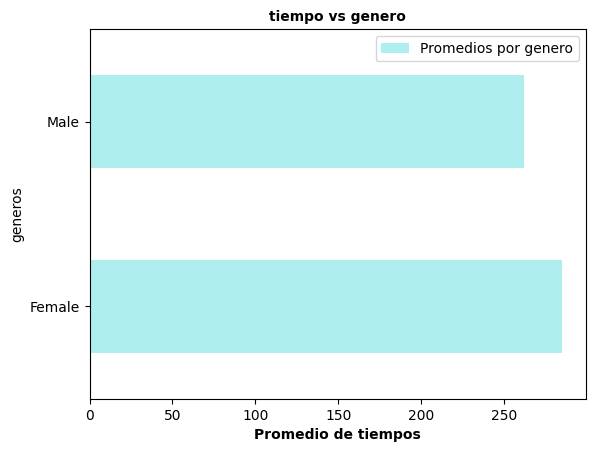

In [56]:
df.groupby('gender')['time'].mean().plot(kind='barh', color='paleturquoise', label='Promedios por genero')
plt.xlabel('Promedio de tiempos', weight='bold')
plt.ylabel('generos')
plt.title('tiempo vs genero', weight='bold', size=10)
plt.legend()
plt.plot()


Acá podemos ver, según el gráfico, que las mujeres de esta maratón tuvieron un promedio en tiempo más alto que el de los hombres


# >CANTIDAD DE CORREDORES SEGUN CIUDAD

In [57]:
import plotly.express as px
c=df['home'].value_counts()
fig=px.bar(y=c, x=c.index)
fig.show()

Ahora voy a hacer algo que, si bien no era requerido, investigando en internet me pareció súper creativo y que sumaba. Voy a marcar en un mapa las regiones en donde hay corredores. Para esto usé la libreria folium y un json (archivo plano) con todas las regiones de Estados Unidos. Por otro lado, el mapa se colorea de diferente manera según la cantidad de corredores por región.

In [58]:
import folium

In [59]:
m = folium.Map(location=[40, -95], zoom_start=3)
'''acá me fije que el mapa se vea (ignorar)'''

'acá me fije que el mapa se vea (ignorar)'

In [60]:
ciudades = df['home']
cantidades = df['home'].value_counts()
state_data = df

In [75]:

    folium.Choropleth(
    geo_data='us_region_geo.json',
    name="mapa coloreado",
    data=cantidades,
    columns=df['home'],
    key_on="feature.id",
    color='cantidades',
    color_continuous_scale='green',
    threshold_scale = [0,50,100,200,250,300],
    fill_color = 'PuRd',
    fill_opacity=0.7,
    line_opacity=1,
    legend_name="cantidad de corredores por ciudad",
    ).add_to(m)
    fig.update_geos(showcountries=True, showcoastlines=True, showland=True, fitbounds="locations"),
    folium.LayerControl().add_to(m)
    m
    

In [81]:
def graficoDePuntos(nombreX,nombreY):
    plt.scatter(df['age'],df['time'], marker='*', c='mediumturquoise',s=50)
    plt.title('Tiempo vs edad en grafico de dispersion')
    plt.xlabel(nombreX)
    plt.ylabel(nombreY)
    plt.show()

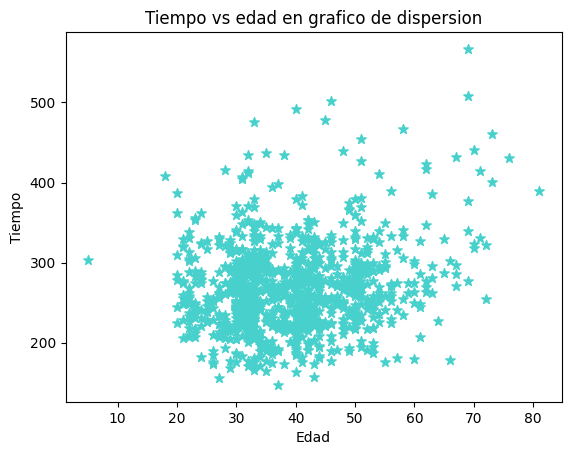

In [82]:
graficoDePuntos('Edad','Tiempo')

Ahora hice un gráfico de dispersión de tiempo vs edad para tener un pantallazo. De todas maneras cuando haga regresión lineal profundizaremos sobre este mismo

Teniendo un panorama general de los datos de nuestros corredores,
podemos empezar a trabajar con las estadísticas


Vamos a tener como premisa que a mayor edad, el rendimiento es menor. En este caso, quienes tengan los tiempos mas altos serán aquellos que tengan mayor edad

el tiempo maximo de nuestros corredores es 566.7833333
el tiempo minimo de nuestros corredores es 147.3333333
la edad maxima de nuestros corredores es 81
la edad minima de nuestros corredores es 5


Text(4.944444444444445, 0.5, 'cantidad')

<Figure size 1500x1000 with 0 Axes>

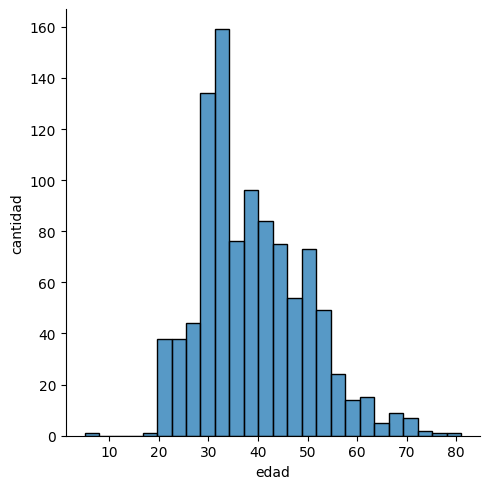

In [64]:

#prefiero hacer variables para trabajar mas rapido, este grafo es mas bien para dar un poco mas de info 

tiempoMax=df['time'].max()
tiempoMin=df['time'].min()
edadMax=df['age'].max()
edadMin=df['age'].min()

print(f'el tiempo maximo de nuestros corredores es', tiempoMax)
print(f'el tiempo minimo de nuestros corredores es', tiempoMin)
print(f'la edad maxima de nuestros corredores es', edadMax)
print(f'la edad minima de nuestros corredores es', edadMin)

plt.figure(figsize=(15,10))
plt.tight_layout()
sns.displot(df['age'])
plt.xlabel('edad')
plt.ylabel('cantidad')


En el cuadro anterior, podemos ver que la mayor cantidad de corredores tiene entre 30 y 40 años 

# Empiezo con regresion lineal
Mi premisa es que a mayor edad, el rendimiento es menor por lo que el tiempo es más alto.
Mi variable independiente es el tiempo y la variable dependiente es la edad.

Si y=f(x) => y = tiempo, x = edad

In [65]:
X = df['age'].values.reshape(-1,1)
y = df['time'].values.reshape(-1,1)
df_aux = pd.DataFrame({'X': X.flatten(), 'y': y.flatten()})
df_aux

,X,y
0,52,217.483333
1,40,272.550000
2,31,265.283333
3,33,256.150000
4,33,252.250000
...,...,...
995,61,285.883333
996,37,191.916667
997,53,289.016667
998,21,276.050000


En el bloque anterior, separé mi conjunto de atributos (edad) y mi conjunto de etiquetas (tiempo) en una misma tabla


Una vez que separé mis variables de estudio, voy a usar la mitad de esos datos para las pruebas y la otra mitad para el estudio, para eso voy a usar una variable auxiliar para un dataframe de estudio

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
df_aux = pd.DataFrame({'X_train': X_train.flatten(), 'y_train': y_train.flatten()})
df_aux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X_train  500 non-null    int64  
 1   y_train  500 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 7.9 KB


Como vemos, la variable auxiliar contiene la mitad de los registros (500). Lo que hacemos con la función flatten() es 'aplanar' los datos en una matriz de una sola dimensión para que puedan ser leídos de manera lineal.

In [67]:
df_aux = pd.DataFrame({'X_test': X_test.flatten(), 'y_test': y_test.flatten()})
df_aux.head()

,X_test,y_test
0,40,263.383333
1,26,184.200000
2,50,283.783333
3,30,243.200000
4,28,228.350000


In [68]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train) 

LinearRegression()

Acá llamo el método fit de la clase regressor para buscar la ordenada al origen y la pendiente de la recta de tendencia

In [69]:
print(regressor.intercept_)
print(regressor.coef_)

[241.42478487]
[[0.70494497]]


Para comprender este concepto nos basamos en que la regresión lineal tiene como objetivo devolvernos una recta del tipo y=mx+b donde 'x' es la pendiente e 'y' es la ordenada al origen.
Los resultados anteriores son el de la interseccion con el eje 'y', cuando x vale 0 (ordenada al origen) y la pendiente ('inclinación') de la  recta. En este caso, la pendiente es 0.7 y la ordenada al origen es 241.42(aprox), lo que sugiere que por cada unidad de edad hay un cambio de 0.7 en tiempo.

In [70]:
y_pred = regressor.predict(X_test)
df_aux = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_aux

,Actual,Predicted
0,263.383333,269.622584
1,184.200000,259.753354
2,283.783333,276.672034
3,243.200000,262.573134
4,228.350000,261.163244
...,...,...
495,275.616667,261.868189
496,253.283333,278.786869
497,230.133333,263.278079
498,275.066667,258.343464


Como último paso, vamos a ver los errores absolutos a modo de prueba de eficacia del algoritmo (ver qué tan bien o no funciona nuestro algoritmo)

In [71]:
print('Error Absoluto Medio:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Error Cuadrático Medio:', metrics.mean_squared_error(y_test, y_pred)) 
print('Raíz del error cuadrático medio:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Absoluto Medio: 39.96139904568801
Error Cuadrático Medio: 2960.6817224324955
Raíz del error cuadrático medio: 54.41214682800611


En este testeo podemos ver que los resultados no son tan dispares como decía la premisa. Tampoco como lo decía el algoritmo. Lo veremos gráficamente pero podemos concluir que la predicción original no es del todo fehaciente, lo bueno es que a partir de estos resultados podemos dudar de éstas y otras premisas y sabremos cómo corroborar los datos y analizarlos exhaustivamente para llegar a determinada conclusión y verificar la veracidad de las afirmaciones.

En la tabla anterior podemos ver las diferencias entre lo que nuestro algoritmo predijo y la realidad de nuestro conjunto de datos. 
De todas maneras, visto de manera gráfica se ve de esta forma:

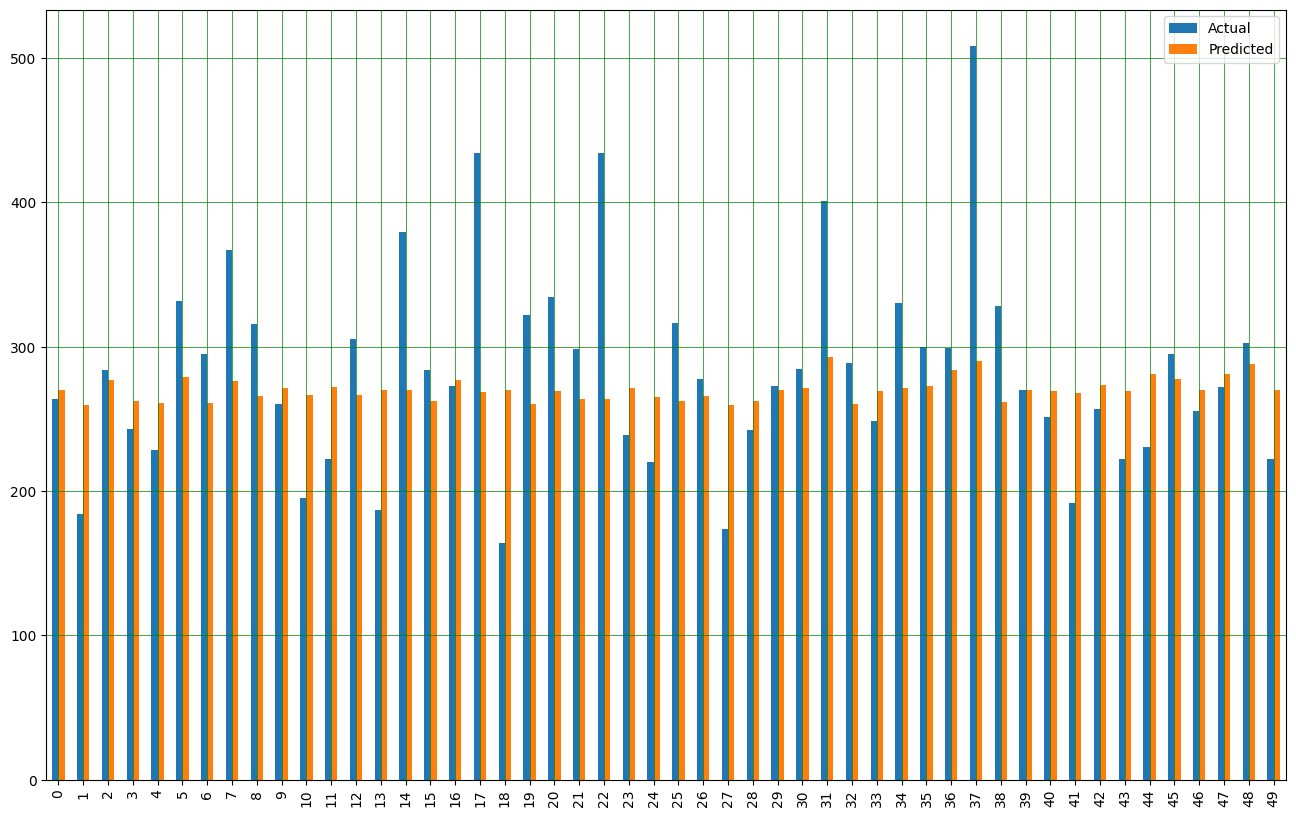

In [72]:
def graficoBarrasActualPredicho():
    df1 = df_aux.head(50)
    df1.plot(kind='bar',figsize=(16,10))
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.show()
    
graficoBarrasActualPredicho()

En este caso, tomé solo 50 de los 500 datos (un 10%). Como ppodemos observar, hay casos donde el algoritmo estuvo relativamente cerca del resultado real y otros donde la diferencia es absolutamente notoria. Veremos con un gráfico de puntos si podemos encontrar alguna coincidencia con nuestra premisa inicial
 (a > edad, < rendimiento)

In [73]:
def graficoRegresion():
    plt.scatter(X_test, y_test, marker='*', c='indianred')
    plt.plot(X_test, y_pred, color='dimgrey', linewidth=3)
    plt.ylabel('edad')
    plt.xlabel('tiempo')
    plt.show()


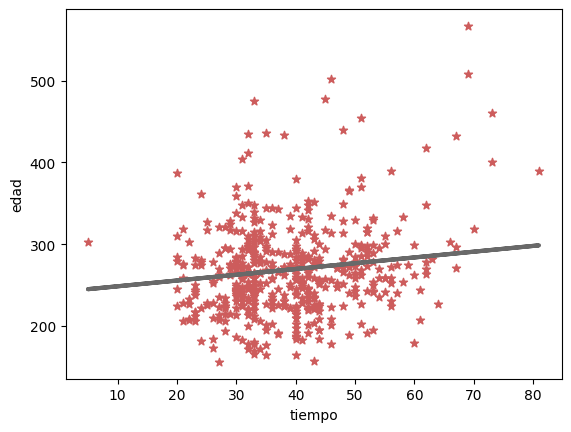

In [74]:
graficoRegresion()

Podemos obervar una tendencia superior en tiempo en las edades mas altas, sin embargo el cambio no es demasiado significativo. Creo que unn 0,7 de pendiente es un valor acertado para la pendiente de la linea de tendencia, como conclusión: Si bien aquellos corredores que han tardado más tiempo tienen una edad mayor a la media, no son los únicos con tiempos altos. Los corredores 'jóvenes' también tuvieron tiempos altos. Faltarían más datos o más condiciones de estudio para llegar a un resultado concreto y fehaciente.